In [2]:
#LR model for happiness_rate vs alchohol_consumption

import math as mt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/Users/arunramji/Downloads/Sourcefiles/Alchol_vs_Happiness.csv',',',
                  usecols=['Country','Alcohol','Happiness Score'])

In [3]:
data.head()

,Country,Alcohol,Happiness Score
0,Denmark,194.333333,7.526
1,Switzerland,188.333333,7.509
2,Iceland,124.000000,7.501
3,Norway,123.000000,7.498
4,Finland,164.333333,7.413


In [4]:
A = data[['Alcohol','Happiness Score']]
A.tail()

,Alcohol,Happiness Score
117,14.333333,3.666
118,57.666667,3.622
119,17.000000,3.484
120,19.000000,3.303
121,18.666667,3.069


In [5]:
matrix = np.array(A.values,'float')
matrix[0:5,:]    #first 5 rows of data

array([[194.33333333,   7.526     ],
       [188.33333333,   7.509     ],
       [124.        ,   7.501     ],
       [123.        ,   7.498     ],
       [164.33333333,   7.413     ]])

In [6]:
matrix.shape

(122, 2)

In [7]:
#Assign input and target variable
X = matrix[:,0]
y = matrix[:,1]

In [8]:
#feature normalization
X = X/(np.max(X))
X

array([0.87669173, 0.84962406, 0.5593985 , 0.55488722, 0.74135338,
       0.69473684, 0.79548872, 0.68721805, 0.81954887, 0.59849624,
       0.21203008, 0.81954887, 0.73834586, 0.37142857, 0.9593985 ,
       0.61052632, 0.8887218 , 0.8962406 , 0.96240602, 0.46766917,
       0.12481203, 0.81203008, 0.6406015 , 0.61203008, 0.66015038,
       1.        , 0.23458647, 0.55639098, 0.55488722, 0.35789474,
       0.97443609, 0.53834586, 0.07518797, 0.83157895, 0.18646617,
       0.47067669, 0.16842105, 0.54135338, 0.6556391 , 0.90977444,
       0.18496241, 0.2962406 , 0.20150376, 0.54736842, 0.3593985 ,
       0.57894737, 0.44360902, 0.57443609, 0.53082707, 0.97142857,
       0.92330827, 0.2481203 , 0.32481203, 0.96691729, 0.83759398,
       0.89774436, 0.51729323, 0.18345865, 0.22105263, 0.8406015 ,
       0.69022556, 0.6075188 , 0.88120301, 0.71729323, 0.28270677,
       0.85864662, 0.12030075, 0.04210526, 0.10827068, 0.38796992,
       0.41954887, 0.20150376, 0.81353383, 0.38646617, 0.41052

In [9]:
#plotting x and y

import matplotlib.pyplot as plt

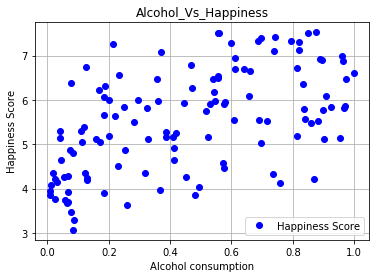

In [10]:
plt.plot(X,y,'bo')
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['Happiness Score'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

In [11]:
#initialising parameter 

m = np.size(y)
X = X.reshape([122,1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])
print(theta,'\n',m)

[[0.]
 [0.]] 
 122


In [12]:
#computing cost J(theta) for 0 theta

def computecost(x,y,theta):
    
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

In [13]:
print(computecost(x,y,theta))

1941.7825705000002


In [14]:
#setting parameter for gradient descend
def gradient(x,y,theta):
    
    alpha = 0.00001
    iteration = 2000

    #gradient descend algorithm
    J_history = np.zeros([iteration, 1]);

    for iter in range(0,2000):
        
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:,0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:,1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum(((x @ theta)-y)**2))
    return theta , J_history

In [15]:
theta , J = gradient(x,y,theta)
print(theta)

[[4.22499706]
 [2.38031097]]


In [16]:
J

array([[1936.24274283],
       [1930.71941566],
       [1925.21254022],
       ...,
       [ 115.49668262],
       [ 115.49460323],
       [ 115.49255932]])

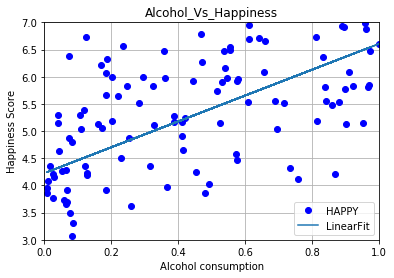

In [17]:
#plot linear fit for out theta
plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.axis([0,1,3,7])
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['HAPPY','LinearFit'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

In [18]:
# predict Happiness score 
#normalised_input = 124/np.max(matrix[:,0])
predict1 = [1,(164/np.max(matrix[:,0]))] @ theta
print(predict1)

[5.98606924]


In [19]:
#visualising J (theta0 , theta1)

theta0_vals = np.linspace(-5,10,100).reshape(1,100)
theta1_vals = np.linspace(-5,10,100).reshape(1,100)

#initialise J value to matrix of 0
J_vals = np.zeros([np.size(theta0_vals),np.size(theta1_vals)])

#fill J_vals
for i in range(0,np.size(theta0_vals)):
    for j in range(0,np.size(theta1_vals)):
        t = np.array([theta0_vals[:,i],theta1_vals[:,j]])
        J_vals[i,j] = computecost(x,y,t)
        

In [20]:
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T


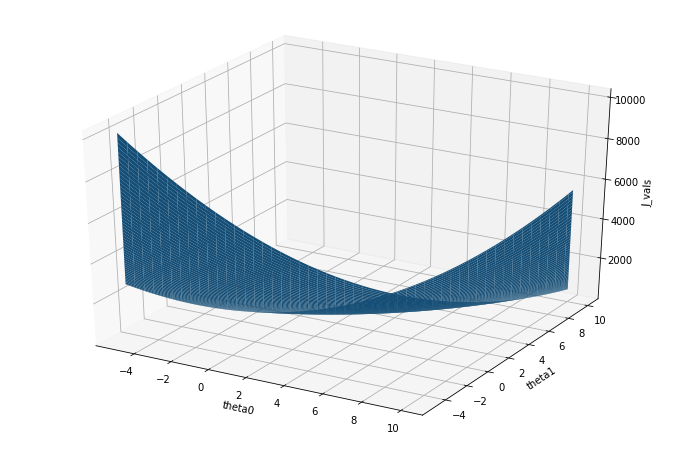

In [21]:
#surface plot for covergence
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=[12.0,8.0])
ax = fig.add_subplot(111,projection ='3d')
ax.plot_surface(theta0_vals,theta1_vals,J_vals)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J_vals')


plt.show()

In [24]:
x.shape

(122, 2)

In [23]:
theta.shape

(2, 1)